In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

/Users/com/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/com/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Данные:
Будем работать с датасетом [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). 

In [2]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

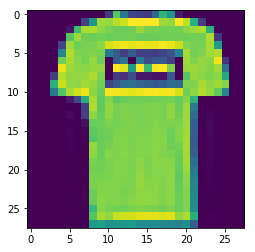

In [3]:
plt.imshow(X_train[1].reshape([28,28]))

### Задание:
Будем решать задачу классификации на 10 классов. Каждый класс соответствует одному из типов одежды. Исходная размерность признакового пространства: `784`, каждый пиксель является признаком. Будем снижать размерность признакового пространства с помощью метода главных компонент (`PCA`). Ваша задача оценить качество решенения задачи классификации по метрике `accuracy` в зависимости от числа главных компонент. Также оцените дисперсию функции качества в зависимости от числа главных компонент.

Нарисуйте график зависимости функции качества и ее дисперсии от числа главных компонент.

In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
pca = PCA(n_components=3)
used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
lr = LogisticRegression()
lr.fit(X_train_lowdim, y_train[used_indices])
accuracy_score(y_test, lr.predict(pca.transform(X_test.reshape([-1, 784]))))

0.5782

Используйте следующую сетку числа главных компонент: `[3, 5, 7, 12, 18, 25, 33, 40, 48, 55]`. Для ускорения сходимости можете семплировать подвыборки из `X_train`. 

In [6]:
pca = PCA(n_components=3)

In [7]:
def step(comp):
    pca = PCA(n_components=comp)
    used_indices = np.random.choice(np.arange(X_train.shape[0]), 10000, replace=False)
    X_train_lowdim = pca.fit_transform(X_train[used_indices].reshape([-1, 784]))
    lr = LogisticRegression()
    lr.fit(X_train_lowdim, y_train[used_indices])
    return lr.predict(pca.transform(X_test.reshape([-1, 784])))
    
def get_accuracy(comp):
    accuracy = []
    for i in range(10):
        accuracy.append(accuracy_score(y_test, step(comp)))
    return np.mean(accuracy), np.var(accuracy)

In [8]:
main_components = [3, 5, 7, 12, 18, 25, 33, 40, 55]
accuracy = []
variances = []

for comp in main_components:
    acc, var = get_accuracy(comp)
    accuracy.append(acc)
    variances.append(var)

In [9]:
from matplotlib import pylab as plt
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 36
plt.rcParams['axes.labelsize'] = 24

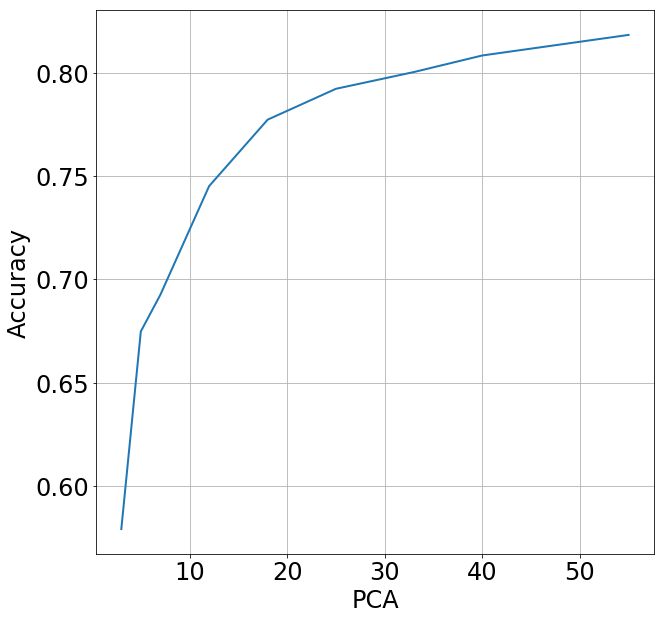

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(main_components, accuracy)
plt.grid()
plt.xlabel("PCA")
plt.ylabel("Accuracy")
plt.show()

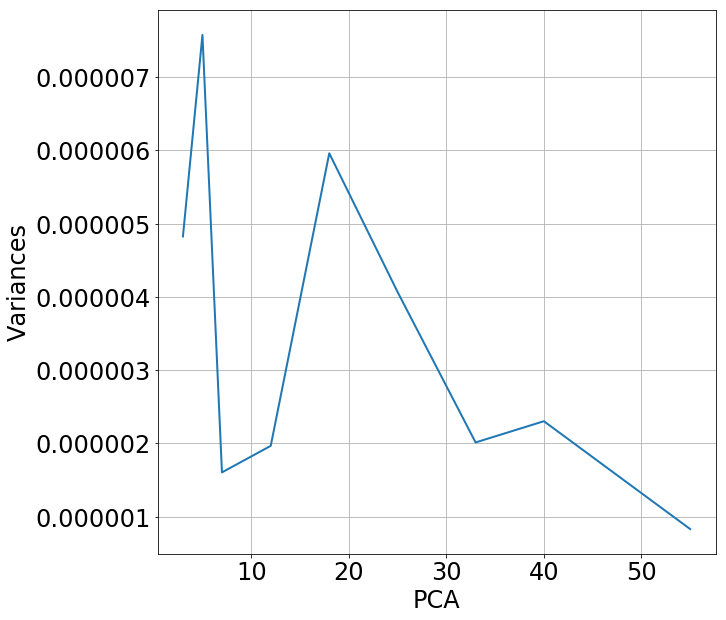

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(main_components, variances)
plt.grid()
plt.xlabel("PCA")
plt.ylabel("Variances")
plt.show()